In [61]:
import os
os.getcwd()

'/content/drive/MyDrive/21-1/Computational Physics'

In [60]:
os.chdir('/content/drive/MyDrive/21-1/Computational Physics')

In [62]:
from ch2 import *

In [37]:
import numpy as np
amat = np.array([[ 3.0,-1.0,4.0],
                 [-2.0, 0.0,5.0],
                 [ 7.0, 2.0,-2.0]])

In [38]:
a=amat.copy()

In [39]:
a

array([[ 3., -1.,  4.],
       [-2.,  0.,  5.],
       [ 7.,  2., -2.]])

In [40]:
a=amat.copy()
#2nd row, 1col
lam1 = a[1,0]/a[0,0]
a[1]=a[1]-lam1*a[0] #modify sec row

#3rd row, 1col
lam2=a[2,0]/a[0,0]
a[2]=a[2]-lam2*a[0]

#3rd row, 2col
lam3=a[2,1]/a[1,1]
a[2]=a[2]-lam3*a[1]
a

array([[ 3.        , -1.        ,  4.        ],
       [ 0.        , -0.66666667,  7.66666667],
       [ 0.        ,  0.        , 38.5       ]])

In [41]:
L=np.eye(3)
U=a.copy()
L[1,0] = lam1
L[2,0] = lam2
L[2,1] = lam3
print(L,'\n',U)

[[ 1.          0.          0.        ]
 [-0.66666667  1.          0.        ]
 [ 2.33333333 -6.5         1.        ]] 
 [[ 3.         -1.          4.        ]
 [ 0.         -0.66666667  7.66666667]
 [ 0.          0.         38.5       ]]


In [42]:
L@U

array([[ 3., -1.,  4.],
       [-2.,  0.,  5.],
       [ 7.,  2., -2.]])

In [ ]:
"""
U:상삼각
L:하삼각 (대각 1) 원소는 lam
A@x=b=L@U@x
A=L@U
U@x=y
L@y=b

L@U@x = b =A@x
"""

In [43]:
b=np.array([6,3,7],dtype=float)
n = len(b)
y= np.zeros(n)
x= np.zeros(n)
#forward substitution
y[0] = b[0]
for k in range(1,n):
  y[k]=b[k]-np.dot(L[k,0:k],y[0:k])
print(f'y {y}')

for k in range(n-1,-1,-1):
  x[k]=(y[k]-np.dot(U[k,k+1:n],x[k+1:n]))/U[k,k]

print(x)


y [ 6.   7.  38.5]
[-47.   432.25   1.  ]


In [51]:
Amat=np.array([[1,4,1],
            [1,6,-1],
            [2,-1,2]],
           dtype=float)

b=np.array([7,13,5],dtype=float)

In [54]:
A=Amat.copy()
L=np.eye(3)
for j in range(0,2):
  for i in range(j+1,3):
    L[i,j]=A[i,j]/A[j,j]
    A[i]=A[i]-L[i,j]*A[j]
    print(A)
    print(L)
    print()

U=A.copy()

[[ 1.  4.  1.]
 [ 0.  2. -2.]
 [ 2. -1.  2.]]
[[1. 0. 0.]
 [1. 1. 0.]
 [0. 0. 1.]]

[[ 1.  4.  1.]
 [ 0.  2. -2.]
 [ 0. -9.  0.]]
[[1. 0. 0.]
 [1. 1. 0.]
 [2. 0. 1.]]

[[ 1.  4.  1.]
 [ 0.  2. -2.]
 [ 0.  0. -9.]]
[[ 1.   0.   0. ]
 [ 1.   1.   0. ]
 [ 2.  -4.5  1. ]]



In [55]:
n = len(b)
y= np.zeros(n)
x= np.zeros(n)
#forward substitution
y[0] = b[0]
for k in range(1,n):
  y[k]=b[k]-np.dot(L[k,0:k],y[0:k])
print(f'y {y}')

#backward
for k in range(n-1,-1,-1):
  x[k]=(y[k]-np.dot(U[k,k+1:n],x[k+1:n]))/U[k,k]

print(x)

y [ 7.  6. 18.]
[ 5.  1. -2.]


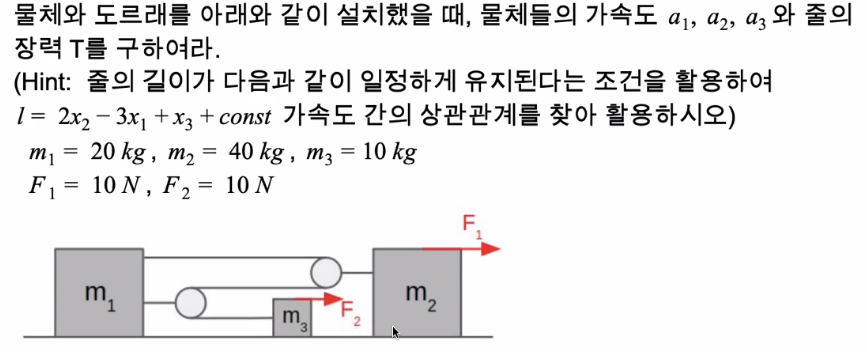

In [ ]:
# m1*a1=3*T
# m2*a2 =F1-2*T
# m3*a3 = F2-T

# L=2*x2=3*x1+x3+const 
# 미분 두번 0=2*a2-3*a1+a3
# x=[a1,a2, a3, T]


In [64]:
m1=20;m2=40;m3=10
F1=10;F2=10
A=np.array([[m1,0,0,-3],
           [0,m2,0,-2],
           [0,0,m3,1],
           [-3,2,1,0]])

b=np.array([0,F1,F2,0])

In [65]:
np.linalg.solve(A,b)

array([0.5       , 0.41666667, 0.66666667, 3.33333333])